# Data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [41]:
from sklearn.datasets import make_blobs
N = 3000
Ncl = 3
d = 2
centers = np.array([[-3,3],[0, 0], [2,2]])
X, y = make_blobs(n_samples=N, centers=centers, n_features=d, random_state=0)

In [42]:
y

array([1, 1, 2, ..., 2, 1, 0])

In [43]:
sum(y == 0), sum(y == 1), sum(y == 2)

(1000, 1000, 1000)

In [44]:
OHE = np.zeros((N, Ncl))
OHE[np.arange(N), y] = 1

In [45]:
OHE[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [46]:
y[:5]

array([1, 1, 2, 0, 1])

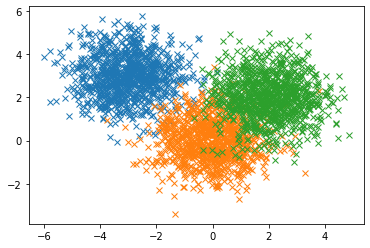

In [47]:
for i in range(3):
    plt.plot(X[y == i][:,0], X[y == i][:,1], 'x')

# SKLearn Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic regression requires transpose of our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train) # Train on train data
y_pred = lr.predict(X_test) # Predict on test data

print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, lr.predict(X_test))))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[320   9   3]
 [  3 306  28]
 [  0  17 304]]
Accuracy on Test Data:0.94


In [49]:
lr.coef_, lr.intercept_

(array([[-2.69149681,  1.43572421],
        [ 0.26884638, -1.77365931],
        [ 2.42265043,  0.3379351 ]]),
 array([-4.84400499,  4.49174453,  0.35226046]))

# Bayes

$$
p(c_i / x) = \frac{p(x/c_i) p(c_i)}{p(x)} \approx p(x/c_i) p(c_i)
$$


Our model

$$
g_i(x) = log p(x/c_i) + log p(c_i)
$$

Gaussian
$$
p(x; \theta, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [11]:
from scipy.stats import multivariate_normal

def model(x, mu, std, prior):
    snd = multivariate_normal.pdf(x, mu, std)
    return np.log(snd) + np.log(prior)

In [12]:
def getParameters(X, y, classid):
    mu = X[y == classid].mean(axis = 0)
    sig = np.cov(X[y == classid].T)
    prior = len(X[y == classid])/len(X)
    return mu, sig, prior

In [13]:
mu0, sig0, prior0  = getParameters(X_train, y_train, classid = 0)
mu1, sig1, prior1 = getParameters(X_train, y_train, classid = 1)
mu2, sig2, prior2 = getParameters(X_train, y_train, classid = 2)

In [14]:
len(X_train), len(X_test)

(2010, 990)

In [15]:
p0 = np.array([[model(x, mu0, sig0, prior0) for x in X_test]])
p1 = np.array([[model(x, mu1, sig1, prior1) for x in X_test]])
p2 = np.array([[model(x, mu2, sig2, prior2) for x in X_test]])

In [16]:
y_pred_bayes = np.argmax(np.concatenate((p0,p1,p2), axis = 0), axis = 0)
y_pred_bayes

array([2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0,
       1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0,
       1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0,
       0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2,

In [17]:
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred_bayes)))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, y_pred_bayes)))

Confusion Matrix: 
 [[331   1   0]
 [  1 335   1]
 [  0   1 320]]
Accuracy on Test Data:1.0


In [18]:
class Bayesian():
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.cs = np.unique(self.y);
        self.thetas = {}
        
    def getParameters(self, classid):
        theta = {}
        theta['mu'] = self.X[self.y == classid].mean(axis = 0)
        theta['sig'] = np.cov(self.X[self.y == classid].T)
        theta['prior'] = len(self.X[self.y == classid])/len(self.X)
        return theta

    def fit(self):
        for c in self.cs :
            theta = self.getParameters(classid = c)
            self.thetas[f'class{c}'] = theta
            
    def predict(self, X_test):
        vals = list()
        for theta in bay.thetas.values():
            vals.append(np.array([[model(x, theta['mu'], theta['sig'], theta['prior']) for x in X_test]]))
        y_pred = np.argmax(np.concatenate(vals, axis = 0), axis = 0)
        return y_pred

In [19]:
bay = Bayesian(X_train, y_train)

In [20]:
bay.fit()

In [21]:
y_pred = bay.predict(X_test)
y_pred

array([2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0,
       1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0,
       1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0,
       0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2,

In [22]:
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[331   1   0]
 [  1 335   1]
 [  0   1 320]]
Accuracy on Test Data:1.0


In [23]:
X.shape[1]

2

# Pytorch ile Logistic Regression

In [50]:
from IPython import display
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).long().to(device)

# Linear Model
learning_rate = 1e-1 # alpha

# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(2, 3),
)

# CrossEntropyLoss kullanildiginda softmax otomatik dahil edilmis olur
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

n_epoch = 1000
for t in range(n_epoch):
    
    # Feed forward to get the logits
    y_pred = model(x_train_tensor)
    
    # Compute the loss (BCE: Binary Cross Entropy Loss)
    loss = criterion(y_pred, y_train_tensor)
    # Dont accumulate previous gradients
    optimizer.zero_grad()

    print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
    display.clear_output(wait=True)
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999/1000, [LOSS]: 0.276253


In [51]:
for name, param in model.named_parameters():
    print(name, '>>', param.data)

0.weight >> tensor([[-0.8236,  0.5466],
        [-0.0630, -0.4138],
        [ 0.9685,  0.6412]])
0.bias >> tensor([-0.8441,  0.9129, -0.5238])


In [52]:
x_test_tensor = torch.from_numpy(X_test).float().to(device)
y_test_pred = model(x_test_tensor)

In [53]:
lr_pred = y_test_pred.argmax(axis = 1)
lr_pred

tensor([2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0,
        2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2,
        2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1,
        0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2,
        0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2,
        0, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1,
        0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0,
        1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 0,
        0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0,
        1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1,
        1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0,
        0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2,
        2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2,

In [54]:
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, lr_pred)))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, lr_pred)))

Confusion Matrix: 
 [[328   1   3]
 [ 21 265  51]
 [  1  10 310]]
Accuracy on Test Data:0.91


In [57]:
from IPython import display
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).long().to(device)

# Linear Model
learning_rate = 1e-1 # alpha

# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(2, 10000),
    nn.Sigmoid(),
    nn.Linear(10000, 3),
)

# CrossEntropyLoss kullanildiginda softmax otomatik dahil edilmis olur
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

n_epoch = 1000
for t in range(n_epoch):
    
    # Feed forward to get the logits
    y_pred = model(x_train_tensor)
    
    # Compute the loss (BCE: Binary Cross Entropy Loss)
    loss = criterion(y_pred, y_train_tensor)
    # Dont accumulate previous gradients
    optimizer.zero_grad()

    print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
    display.clear_output(wait=True)
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999/1000, [LOSS]: 0.505950


In [59]:
x_test_tensor = torch.from_numpy(X_test).float().to(device)
y_test_pred = model(x_test_tensor)

lr_pred = y_test_pred.argmax(axis = 1)

print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, lr_pred)))
print('Accuracy on Test Data:{:.2}'.format(accuracy_score(y_test, lr_pred)))

Confusion Matrix: 
 [[321   8   3]
 [  4 307  26]
 [  0  15 306]]
Accuracy on Test Data:0.94


# Model Selection

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42, stratify = y_train)

In [30]:
len(X_train),len(X_val),len(X_test),len(X)

(1708, 450, 842, 3000)

In [31]:
def train(X_train, y_train, model, lr):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    x_train_tensor = torch.from_numpy(X_train).float().to(device)
    y_train_tensor = torch.from_numpy(y_train).long().to(device)

    # nn package to create our linear model
    # each Linear module has a weight and bias


    # CrossEntropyLoss kullanildiginda softmax otomatik dahil edilmis olur
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    n_epoch = 100
    for t in range(n_epoch):

        # Feed forward to get the logits
        y_pred = model(x_train_tensor)

        # Compute the loss (BCE: Binary Cross Entropy Loss)
        loss = criterion(y_pred, y_train_tensor)
        # Dont accumulate previous gradients
        optimizer.zero_grad()

        print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()
    print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
        
def predict(X_test,y_test, model):
    model.eval()
    x_test_tensor = torch.from_numpy(X_test).float().to(device)
    y_test_pred = model(x_test_tensor)
    lr_pred = y_test_pred.argmax(axis = 1)
    lr_pred
    print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, lr_pred)))
    print('Accuracy on Test Data:{:.4}'.format(accuracy_score(y_test, lr_pred)))

In [32]:
model = nn.Sequential(
        nn.Linear(2, 3))

train(X_train, y_train, model, lr = 0.001)
predict(X_test, y_test, model)

[EPOCH]: 99/100, [LOSS]: 2.318393
Confusion Matrix: 
 [[  0 190  90]
 [  0 260  21]
 [  0 281   0]]
Accuracy on Test Data:0.3088


In [33]:
model2 = nn.Sequential(
        nn.Linear(2, 3))

train(X_train, y_train, model2, lr = 0.01)
predict(X_test, y_test, model2)

[EPOCH]: 99/100, [LOSS]: 0.296522
Confusion Matrix: 
 [[280   0   0]
 [ 36 225  20]
 [  0   0 281]]
Accuracy on Test Data:0.9335


In [34]:
model3 = nn.Sequential(
        nn.Linear(2, 3))

train(X_train, y_train, model3, lr = 0.1)
predict(X_test, y_test, model3)

[EPOCH]: 99/100, [LOSS]: 0.160857
Confusion Matrix: 
 [[280   0   0]
 [ 11 252  18]
 [  0   0 281]]
Accuracy on Test Data:0.9656


In [35]:
model4 = nn.Sequential(
        nn.Linear(2, 3))

train(X_train, y_train, model4, lr = 1)
predict(X_test, y_test, model4)

[EPOCH]: 99/100, [LOSS]: 0.032197
Confusion Matrix: 
 [[280   0   0]
 [  1 279   1]
 [  0   2 279]]
Accuracy on Test Data:0.9952


In [36]:
model5 = nn.Sequential(
        nn.Linear(2, 3))

train(X_train, y_train, model5, lr = 10)
predict(X_test, y_test, model5)

[EPOCH]: 99/100, [LOSS]: 0.020862
Confusion Matrix: 
 [[280   0   0]
 [  2 278   1]
 [  0   3 278]]
Accuracy on Test Data:0.9929


In [37]:
model6 = nn.Sequential(
        nn.Linear(2, 3))

train(X_train, y_train, model6, lr = 100)
predict(X_test, y_test, model6)

[EPOCH]: 99/100, [LOSS]: 0.169907
Confusion Matrix: 
 [[280   0   0]
 [  2 278   1]
 [  0   3 278]]
Accuracy on Test Data:0.9929


In [38]:
for m in {model, model2,model3,model4,model5, model6}:
    predict(X_val, y_val, m)

Confusion Matrix: 
 [[150   0   0]
 [  0 149   1]
 [  0   0 150]]
Accuracy on Test Data:0.9978
Confusion Matrix: 
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy on Test Data:1.0
Confusion Matrix: 
 [[  0 110  40]
 [  0 143   7]
 [  0 150   0]]
Accuracy on Test Data:0.3178
Confusion Matrix: 
 [[150   0   0]
 [  2 145   3]
 [  0   0 150]]
Accuracy on Test Data:0.9889
Confusion Matrix: 
 [[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy on Test Data:1.0
Confusion Matrix: 
 [[150   0   0]
 [ 17 130   3]
 [  0   0 150]]
Accuracy on Test Data:0.9556
